## # 네이버 부동산 데이타 읽어오기 및 시각화

In [1367]:
import pandas as pd
import warnings           
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
warnings.filterwarnings('ignore') 

In [1368]:
base_url ='https://land.naver.com/news/trendReport.naver?page=7'
data = pd.read_html(base_url)

In [1369]:
data

[      번호                                       제목         등록일   조회수
 0   1686  [3월1주 전국] 전국 0.04%, 서울 0.03%, 수도권 0.02%  2022.03.08  1660
 1   1685  [2월4주 전국] 전국 0.04%, 서울 0.04%, 수도권 0.03%  2022.02.25  3008
 2   1684  [2월3주 전국] 전국 0.05%, 서울 0.09%, 수도권 0.06%  2022.02.18  2609
 3   1683  [2월2주 전국] 전국 0.06%, 서울 0.06%, 수도권 0.05%  2022.02.11  2456
 4   1682  [2월1주 전국] 전국 0.09%, 서울 0.02%, 수도권 0.09%  2022.02.04  2671
 5   1681  [1월4주 전국] 전국 0.09%, 서울 0.01%, 수도권 0.03%  2022.01.28  2275
 6   1680  [1월3주 전국] 전국 0.08%, 서울 0.08%, 수도권 0.07%  2022.01.21  2471
 7   1679  [1월2주 전국] 전국 0.07%, 서울 0.04%, 수도권 0.06%  2022.01.14  2712
 8   1678  [1월1주 전국] 전국 0.20%, 서울 0.18%, 수도권 0.17%  2022.01.07  2766
 9   1677  [12월5주 전국]전국 0.18%, 서울 0.12%, 수도권 0.18%  2022.01.03  1968
 10  1676  [12월4주 전국]전국 0.06%, 서울 0.04%, 수도권 0.10%  2021.12.27  2659
 11  1675  [12월3주 전국]전국 0.14%, 서울 0.21%, 수도권 0.13%  2021.12.17  3136
 12  1674  [12월2주 전국]전국 0.19%, 서울 0.10%, 수도권 0.16%  2021.12.15  1687
 13  1673  [12월1주 전국]전국 0.25%, 서울 

In [1370]:
print(type(data))
print(type(data[0]))

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


In [1371]:
# 첫 번째 테이블을 데이터프레임에 저장
df_ori = data[0]
df_ori.info()
df_ori.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      20 non-null     int64 
 1   제목      20 non-null     object
 2   등록일     20 non-null     object
 3   조회수     20 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 772.0+ bytes


,번호,제목,등록일,조회수
0,1686,"[3월1주 전국] 전국 0.04%, 서울 0.03%, 수도권 0.02%",2022.03.08,1660
1,1685,"[2월4주 전국] 전국 0.04%, 서울 0.04%, 수도권 0.03%",2022.02.25,3008
2,1684,"[2월3주 전국] 전국 0.05%, 서울 0.09%, 수도권 0.06%",2022.02.18,2609
3,1683,"[2월2주 전국] 전국 0.06%, 서울 0.06%, 수도권 0.05%",2022.02.11,2456
4,1682,"[2월1주 전국] 전국 0.09%, 서울 0.02%, 수도권 0.09%",2022.02.04,2671


In [1372]:
# 사본 생성
df_copy = df_ori.copy()
df_copy.info()
df_copy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      20 non-null     int64 
 1   제목      20 non-null     object
 2   등록일     20 non-null     object
 3   조회수     20 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 772.0+ bytes


,번호,제목,등록일,조회수
0,1686,"[3월1주 전국] 전국 0.04%, 서울 0.03%, 수도권 0.02%",2022.03.08,1660
1,1685,"[2월4주 전국] 전국 0.04%, 서울 0.04%, 수도권 0.03%",2022.02.25,3008
2,1684,"[2월3주 전국] 전국 0.05%, 서울 0.09%, 수도권 0.06%",2022.02.18,2609
3,1683,"[2월2주 전국] 전국 0.06%, 서울 0.06%, 수도권 0.05%",2022.02.11,2456
4,1682,"[2월1주 전국] 전국 0.09%, 서울 0.02%, 수도권 0.09%",2022.02.04,2671


In [1373]:
# df_temp 변수에서 컬럼 분리하는 작업을 함
# df_temp는 데이터 전처리를 위해 사용되는 임시 데이터프레임
# 원본 데이터프레임 df_copy에서 '제목' 열을 기반으로 특정 문자열 조작과 분할 작업을 수행한 후, 
# 최종적으로 필요한 데이터를 추출하는 역할 
df_temp = df_copy['제목'].str.replace('%','')  # '제목' 열에서 '%' 문자를 공백으로 대체 ok

df_temp.head()

0    [3월1주 전국] 전국 0.04, 서울 0.03, 수도권 0.02
1    [2월4주 전국] 전국 0.04, 서울 0.04, 수도권 0.03
2    [2월3주 전국] 전국 0.05, 서울 0.09, 수도권 0.06
3    [2월2주 전국] 전국 0.06, 서울 0.06, 수도권 0.05
4    [2월1주 전국] 전국 0.09, 서울 0.02, 수도권 0.09
Name: 제목, dtype: object

In [1374]:
# df_temp 에서 (‘전국’, ‘서울’, ‘수도권’)을 찾아서 공백으로 대체 ok
regions=['전국','서울','수도권']
for region in regions:
    df_temp = df_temp.str.replace(region,"")

df_temp.head()

0    [3월1주 ]  0.04,  0.03,  0.02
1    [2월4주 ]  0.04,  0.04,  0.03
2    [2월3주 ]  0.05,  0.09,  0.06
3    [2월2주 ]  0.06,  0.06,  0.05
4    [2월1주 ]  0.09,  0.02,  0.09
Name: 제목, dtype: object

In [1375]:
# expand=True 옵션을 사용하면 분리된 문자열들이 새로운 데이터프레임으로 반환 ok
df_temp = df_temp.str.split(']', expand=True)

df_temp.head()

,0,1
0,[3월1주,"0.04, 0.03, 0.02"
1,[2월4주,"0.04, 0.04, 0.03"
2,[2월3주,"0.05, 0.09, 0.06"
3,[2월2주,"0.06, 0.06, 0.05"
4,[2월1주,"0.09, 0.02, 0.09"


In [1376]:
#df_temp[1] 번째 열
# df_temp[1].info()
# df_temp[1]

In [1377]:
#  #df_temp[1] 번째 열을 또 ','로 분리
df_temp = df_temp[1].str.split(',', expand=True)

df_temp.info()
df_temp.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20 non-null     object
 1   1       20 non-null     object
 2   2       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


,0,1,2
0,0.04,0.03,0.02
1,0.04,0.04,0.03
2,0.05,0.09,0.06
3,0.06,0.06,0.05
4,0.09,0.02,0.09


In [1378]:
# 모든 열 float 타입으로 변환
# 데이터 분석과 시각화를 위해 수치 데이터를 일관된 형식으로 처리하기 위함
df_temp = df_temp.astype(float)
df_temp.info()
df_temp.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float64
 1   1       20 non-null     float64
 2   2       20 non-null     float64
dtypes: float64(3)
memory usage: 612.0 bytes


,0,1,2
0,0.04,0.03,0.02
1,0.04,0.04,0.03
2,0.05,0.09,0.06
3,0.06,0.06,0.05
4,0.09,0.02,0.09


In [1379]:
regions

['전국', '서울', '수도권']

In [1380]:
type(regions)

list

In [1381]:
# ‘전국’, ‘서울’, '수도권’이라는 이름의 열을 df_copy 데이터프레임에 추가
df_copy[regions] = df_temp

In [1382]:
df_copy.head(5)

,번호,제목,등록일,조회수,전국,서울,수도권
0,1686,"[3월1주 전국] 전국 0.04%, 서울 0.03%, 수도권 0.02%",2022.03.08,1660,0.04,0.03,0.02
1,1685,"[2월4주 전국] 전국 0.04%, 서울 0.04%, 수도권 0.03%",2022.02.25,3008,0.04,0.04,0.03
2,1684,"[2월3주 전국] 전국 0.05%, 서울 0.09%, 수도권 0.06%",2022.02.18,2609,0.05,0.09,0.06
3,1683,"[2월2주 전국] 전국 0.06%, 서울 0.06%, 수도권 0.05%",2022.02.11,2456,0.06,0.06,0.05
4,1682,"[2월1주 전국] 전국 0.09%, 서울 0.02%, 수도권 0.09%",2022.02.04,2671,0.09,0.02,0.09


In [1383]:
# print(df_temp.columns)
# print(df_ori.columns)
# print(df_copy.columns)

# print(df_temp.head())
# print(df_ori.head())
# print(df_copy.head())

In [1384]:
# 새로운 데이터프레임을 생성 ; temp가 df_copy
# df_rate는 전처리된 데이터 중에서 특정 열들만을 추출하여 새로운 데이터프레임을 생성하는 역할

df_rate = df_copy[['등록일'] + regions + ['번호']]
# df_rate
print(df_rate.info())
df_rate.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록일     20 non-null     object 
 1   전국      20 non-null     float64
 2   서울      20 non-null     float64
 3   수도권     20 non-null     float64
 4   번호      20 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 932.0+ bytes
None


,등록일,전국,서울,수도권,번호
0,2022.03.08,0.04,0.03,0.02,1686
1,2022.02.25,0.04,0.04,0.03,1685
2,2022.02.18,0.05,0.09,0.06,1684
3,2022.02.11,0.06,0.06,0.05,1683
4,2022.02.04,0.09,0.02,0.09,1682


In [1385]:
# df_rates는 여러 페이지에서 수집된 데이터를 통합하여 하나의 데이터프레임으로 만드는 역할
# 이 데이터프레임은 최종적으로 분석 및 시각화에 사용
# 각 페이지에서 전처리된 데이터프레임 df_rate를 df_rates에 추가하여
# 전체 데이터셋을 구성
df_rates = pd.DataFrame()

In [1386]:
print(df_rates)
print(df_rates.info())

Empty DataFrame
Columns: []
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame
None


In [1387]:
print(df_rate)
print(df_rate.info())

           등록일    전국    서울   수도권    번호
0   2022.03.08  0.04  0.03  0.02  1686
1   2022.02.25  0.04  0.04  0.03  1685
2   2022.02.18  0.05  0.09  0.06  1684
3   2022.02.11  0.06  0.06  0.05  1683
4   2022.02.04  0.09  0.02  0.09  1682
5   2022.01.28  0.09  0.01  0.03  1681
6   2022.01.21  0.08  0.08  0.07  1680
7   2022.01.14  0.07  0.04  0.06  1679
8   2022.01.07  0.20  0.18  0.17  1678
9   2022.01.03  0.18  0.12  0.18  1677
10  2021.12.27  0.06  0.04  0.10  1676
11  2021.12.17  0.14  0.21  0.13  1675
12  2021.12.15  0.19  0.10  0.16  1674
13  2021.12.03  0.25  0.23  0.24  1673
14  2021.11.26  0.23  0.13  0.21  1672
15  2021.11.18  0.25  0.12  0.25  1671
16  2021.11.12  0.29  0.24  0.31  1670
17  2021.11.08  0.34  0.40  0.34  1669
18  2021.11.01  0.30  0.15  0.31  1668
19  2021.10.28  0.50  0.55  0.58  1667
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   

In [1388]:


df_rates = pd.concat([df_rates, df_rate])

In [1389]:
print(df_rate.info())
df_rate.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록일     20 non-null     object 
 1   전국      20 non-null     float64
 2   서울      20 non-null     float64
 3   수도권     20 non-null     float64
 4   번호      20 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 932.0+ bytes
None


,등록일,전국,서울,수도권,번호
0,2022.03.08,0.04,0.03,0.02,1686
1,2022.02.25,0.04,0.04,0.03,1685
2,2022.02.18,0.05,0.09,0.06,1684
3,2022.02.11,0.06,0.06,0.05,1683
4,2022.02.04,0.09,0.02,0.09,1682


           등록일    전국    서울   수도권    번호
19  2021.10.28  0.50  0.55  0.58  1667
18  2021.11.01  0.30  0.15  0.31  1668
17  2021.11.08  0.34  0.40  0.34  1669
16  2021.11.12  0.29  0.24  0.31  1670
15  2021.11.18  0.25  0.12  0.25  1671
14  2021.11.26  0.23  0.13  0.21  1672
13  2021.12.03  0.25  0.23  0.24  1673
12  2021.12.15  0.19  0.10  0.16  1674
11  2021.12.17  0.14  0.21  0.13  1675
10  2021.12.27  0.06  0.04  0.10  1676
9   2022.01.03  0.18  0.12  0.18  1677
8   2022.01.07  0.20  0.18  0.17  1678
7   2022.01.14  0.07  0.04  0.06  1679
6   2022.01.21  0.08  0.08  0.07  1680
5   2022.01.28  0.09  0.01  0.03  1681
4   2022.02.04  0.09  0.02  0.09  1682
3   2022.02.11  0.06  0.06  0.05  1683
2   2022.02.18  0.05  0.09  0.06  1684
1   2022.02.25  0.04  0.04  0.03  1685
0   2022.03.08  0.04  0.03  0.02  1686


<Axes: xlabel='등록일'>

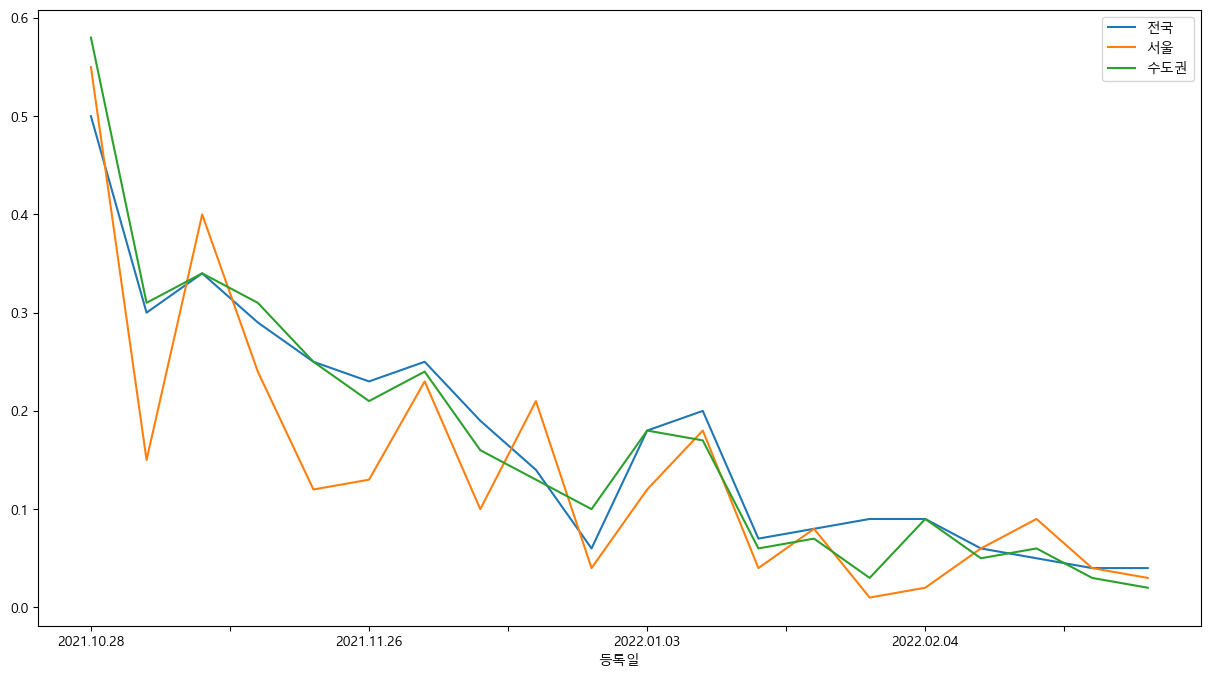

In [1390]:
# 차트 출력하기
df_rates = df_rates[::-1] #  df_rates 데이터프레임의 순서를 역순으로
print(df_rates)
df_rates.head(30).plot(x = '등록일', y = ['전국','서울','수도권'], figsize=(15,8))

In [1391]:
df_rates

,등록일,전국,서울,수도권,번호
19,2021.10.28,0.50,0.55,0.58,1667
18,2021.11.01,0.30,0.15,0.31,1668
17,2021.11.08,0.34,0.40,0.34,1669
16,2021.11.12,0.29,0.24,0.31,1670
15,2021.11.18,0.25,0.12,0.25,1671
14,2021.11.26,0.23,0.13,0.21,1672
13,2021.12.03,0.25,0.23,0.24,1673
12,2021.12.15,0.19,0.10,0.16,1674
11,2021.12.17,0.14,0.21,0.13,1675
10,2021.12.27,0.06,0.04,0.10,1676


In [1392]:
# expand=True 옵션을 사용하면 분리된 문자열들이 새로운 데이터프레임으로 반환
df_temp2 = df_rates['등록일'].str.split('.', expand=True)
df_temp2 = df_temp2.astype(int)
df_temp2

,0,1,2
19,2021,10,28
18,2021,11,1
17,2021,11,8
16,2021,11,12
15,2021,11,18
14,2021,11,26
13,2021,12,3
12,2021,12,15
11,2021,12,17
10,2021,12,27


In [1393]:
date=['년','월','일']
df_rates[date] = df_temp2
df_rates

,등록일,전국,서울,수도권,번호,년,월,일
19,2021.10.28,0.50,0.55,0.58,1667,2021,10,28
18,2021.11.01,0.30,0.15,0.31,1668,2021,11,1
17,2021.11.08,0.34,0.40,0.34,1669,2021,11,8
16,2021.11.12,0.29,0.24,0.31,1670,2021,11,12
15,2021.11.18,0.25,0.12,0.25,1671,2021,11,18
14,2021.11.26,0.23,0.13,0.21,1672,2021,11,26
13,2021.12.03,0.25,0.23,0.24,1673,2021,12,3
12,2021.12.15,0.19,0.10,0.16,1674,2021,12,15
11,2021.12.17,0.14,0.21,0.13,1675,2021,12,17
10,2021.12.27,0.06,0.04,0.10,1676,2021,12,27


In [1394]:
mission1 = df_rates.groupby('월')[['월','전국', '서울', '수도권']].mean()
mission1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 1 to 12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   월       6 non-null      float64
 1   전국      6 non-null      float64
 2   서울      6 non-null      float64
 3   수도권     6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [1395]:
print(mission1.columns)

Index(['월', '전국', '서울', '수도권'], dtype='object')


       월     전국      서울     수도권
월                              
1    1.0  0.124  0.0860  0.1020
2    2.0  0.060  0.0525  0.0575
3    3.0  0.040  0.0300  0.0200
10  10.0  0.500  0.5500  0.5800
11  11.0  0.282  0.2080  0.2840
12  12.0  0.160  0.1450  0.1575


<Axes: xlabel='월'>

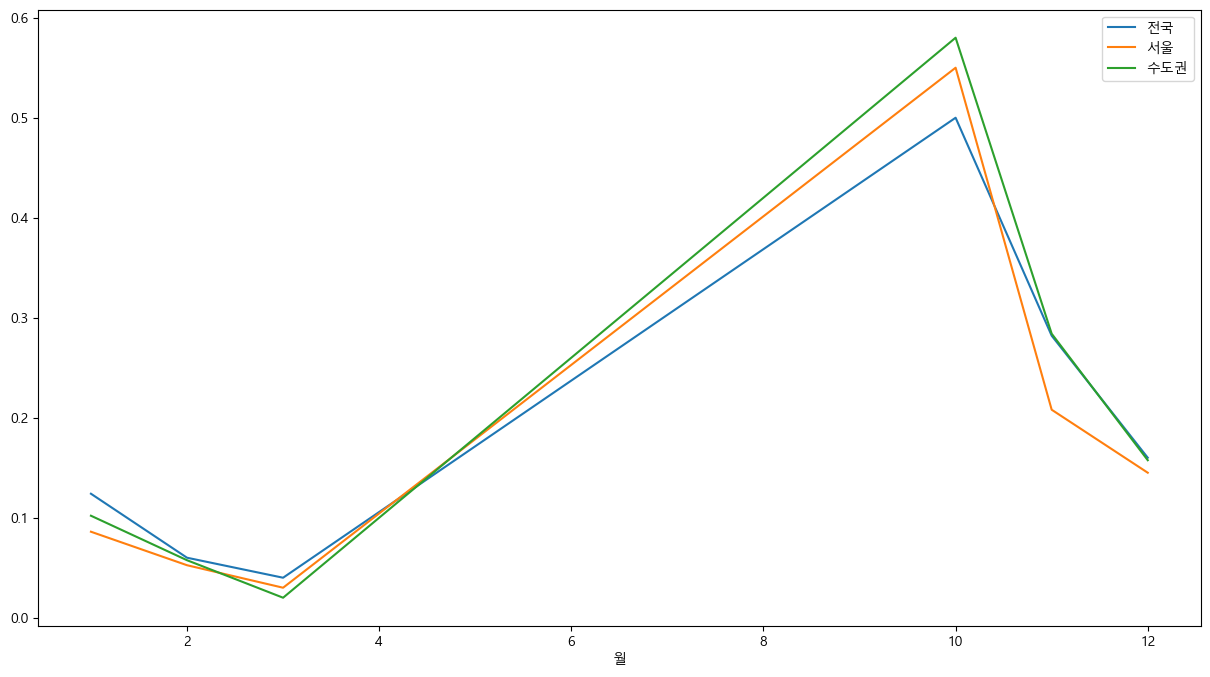

In [1396]:
# 데이타 출력하기
print(mission1)
# 차트 출력하기
mission1.head(30).plot(x = '월', y = ['전국','서울','수도권'], figsize=(15,8))

In [1397]:
mission2 = df_rates.groupby('년')[['년','전국', '서울', '수도권']].mean()
mission2

,년,전국,서울,수도권
년,,,,
2021,2021.0,0.255,0.217,0.263
2022,2022.0,0.090,0.067,0.076


           년     전국     서울    수도권
년                                
2021  2021.0  0.255  0.217  0.263
2022  2022.0  0.090  0.067  0.076


<Axes: xlabel='년'>

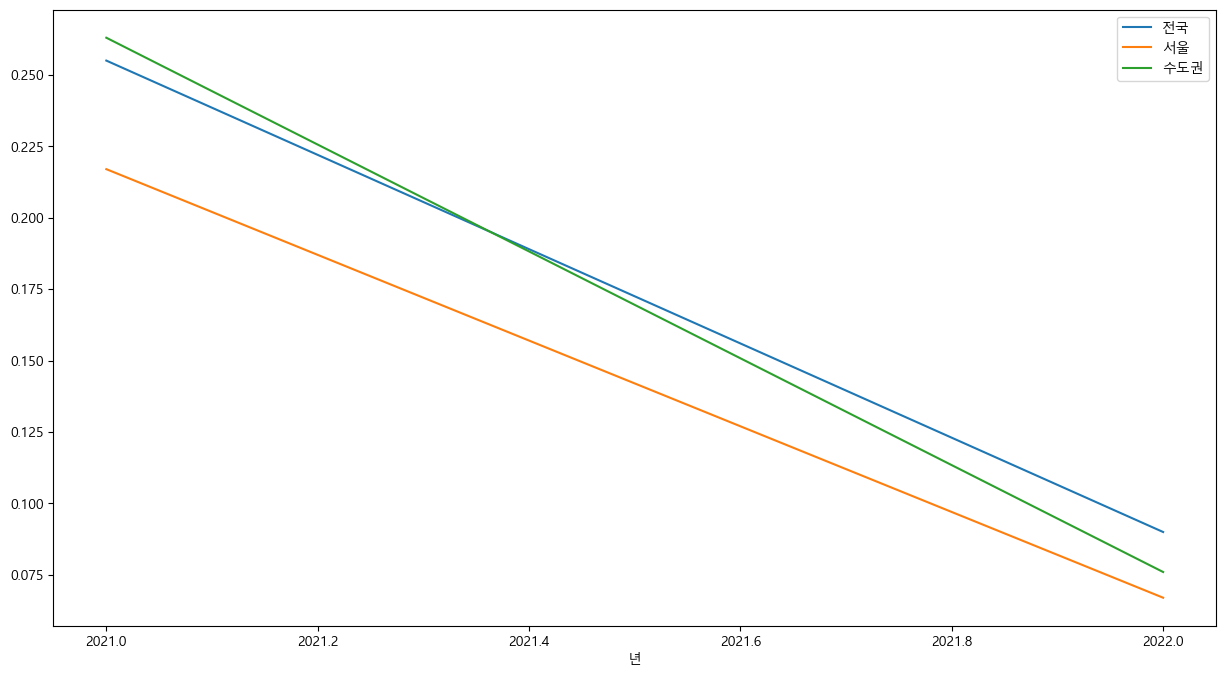

In [1398]:
print(mission2)
# 차트 출력하기
mission2.head(30).plot(x = '년', y = ['전국','서울','수도권'], figsize=(15,8))